In [ ]:
'''
This notebook was developed in fulfillment of GeorgiaTech Spring2022 Machine Leaning Assignment 
on Supervised Learning. The following Algorithms are tested
-- Decision Trees (DT)
-- Neural Networks (NN)
-- Boosting (GBT)
-- Support Vector Machines (SVM)
-- k-Nearest Neighbors (KNN)

'''
# Cluster - georgia_tech
# Runtime: 10.2 ML
# Driver: Standard_DS5_v2
# Worker(s): Standard_DS5_v2
# Created by: Herbert Ssegane
# Date: 01/29/2022
print(' ')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

# SKlearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix, precision_score
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline, make_pipeline

# Supervised Learning Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 10000)
# Suppress scientific notation for panda data frame
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
import numpy
import pandas
import matplotlib
import seaborn
import sklearn

print("numpy=={}".format(numpy.__version__))
print("pandas=={}".format(pandas.__version__))
print("matplotlib=={}".format(matplotlib.__version__))
print("seaborn=={}".format(seaborn.__version__))
print("sklearn=={}".format(sklearn.__version__))

numpy==1.22.2
pandas==1.4.1
matplotlib==3.5.1
seaborn==0.11.2
sklearn==0.24.1

# Data

In [ ]:
# data source
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
# UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
'''
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

'''

# load data and examine features
bcw_df = pd.read_csv('/dbfs/mnt/ml/eng/georgia_tech/machine_learning/BreastCancerWisconsinDiagnosticDataSet.csv')

print(bcw_df.shape)
bcw_df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']].sample(5)

(569, 32)
Out[3]:

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
332,B,11.22,19.86,71.94,387.30,0.11,0.07,0.01,0.01,0.19
556,B,10.16,19.59,64.73,311.70,0.10,0.08,0.01,0.01,0.18
365,M,20.44,21.78,133.80,1293.00,0.09,0.11,0.10,0.08,0.16
30,M,18.63,25.11,124.80,1088.00,0.11,0.19,0.23,0.12,0.22
99,M,14.42,19.77,94.48,642.50,0.10,0.11,0.09,0.06,0.19


In [ ]:
print(list(bcw_df.columns))

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
bcw_df.describe()

Out[5]:

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [ ]:
bcw_df['diagnosis'].value_counts(dropna=False)

Out[6]: B 357
M 212
Name: diagnosis, dtype: int64

In [ ]:
# Recode diagnosis: B==0, M==1
bcw_df['diagnosis'] = bcw_df['diagnosis'].replace({'B':0, 'M':1})
bcw_df['diagnosis'].value_counts(dropna=False)

Out[7]: 0 357
1 212
Name: diagnosis, dtype: int64

In [ ]:
# data source
# https://www.kaggle.com/fedesoriano/heart-failure-prediction
# UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ 
'''
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
   depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

'''

# load data and examine features
hf_df = pd.read_csv('/dbfs/mnt/ml/eng/georgia_tech/machine_learning/HeartFailurePredictionDataset.csv')

print(hf_df.shape)
hf_df.head()

(918, 12)
Out[8]:

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [ ]:
print(list(hf_df.columns))

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

In [ ]:
hf_df.describe()

Out[10]:

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
hf_df['Sex'].value_counts(dropna=False)

Out[11]: M 725
F 193
Name: Sex, dtype: int64

In [ ]:
hf_df['ChestPainType'].value_counts(dropna=False)

Out[12]: ASY 496
NAP 203
ATA 173
TA 46
Name: ChestPainType, dtype: int64

In [ ]:
hf_df['RestingECG'].value_counts(dropna=False)

Out[13]: Normal 552
LVH 188
ST 178
Name: RestingECG, dtype: int64

In [ ]:
hf_df['ExerciseAngina'].value_counts(dropna=False)

Out[14]: N 547
Y 371
Name: ExerciseAngina, dtype: int64

In [ ]:

hf_df['ST_Slope'].value_counts(dropna=False)

Out[15]: Flat 460
Up 395
Down 63
Name: ST_Slope, dtype: int64

In [ ]:
hf_df['HeartDisease'].value_counts(dropna=False)

Out[16]: 1 508
0 410
Name: HeartDisease, dtype: int64

In [ ]:
# transorm categoric features -- OHE

cat_feats = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
hf_df_dummies = pd.get_dummies(hf_df, columns=cat_feats)

print(hf_df.shape)
print(hf_df_dummies.shape)
hf_df_dummies.head()

(918, 12)
(918, 21)
Out[17]:

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.00,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.00,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.00,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.50,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.00,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Breast Cancel data
train_bc, test_bc = train_test_split(bcw_df, test_size=0.3, random_state=42, shuffle=True, stratify=bcw_df['diagnosis'])
X_train_bc = train_bc.drop(columns=['id', 'diagnosis']).reset_index().drop(columns='index')
y_train_bc = train_bc['diagnosis'].reset_index().drop(columns='index')
X_test_bc = test_bc.drop(columns=['id', 'diagnosis']).reset_index().drop(columns='index')
y_test_bc = test_bc['diagnosis'].reset_index().drop(columns='index')

# Heart failure data
train_hf, test_hf = train_test_split(hf_df_dummies, test_size=0.3, random_state=42, shuffle=True, stratify=hf_df['HeartDisease'])
X_train_hf = train_hf.drop(columns='HeartDisease').reset_index().drop(columns='index')
y_train_hf = train_hf['HeartDisease'].reset_index().drop(columns='index')
X_test_hf = test_hf.drop(columns='HeartDisease').reset_index().drop(columns='index')
y_test_hf = test_hf['HeartDisease'].reset_index().drop(columns='index')

print(X_train_bc.shape, X_test_bc.shape)
print(X_train_hf.shape, X_test_hf.shape)

(398, 30) (171, 30)
(642, 20) (276, 20)

In [ ]:
print(y_train_bc[:5])

diagnosis
0 1
1 1
2 0
3 1
4 0

In [ ]:
print(y_train_hf[:5])

HeartDisease
0 1
1 1
2 1
3 0
4 1

# Decision Trees

In [ ]:
# Only focus on max_depth parameter
max_depth_range = list(range(1,11))

# Generate train and validation scores
train_scores, val_scores = validation_curve(DecisionTreeClassifier(criterion='gini',
                                                                  class_weight='balanced',
                                                                  random_state=42),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='max_depth',
                                            param_range=max_depth_range,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

train_scores_mean[:5]

Out[21]: array([0.89942012, 0.93665994, 0.9600802 , 0.97724861, 0.98723984])

In [ ]:
#identify best max_depth and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

opt_max_depth = np.asarray(max_depth_range)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_max_depth, train_f1, val_f1)

1 2 0.94 0.91

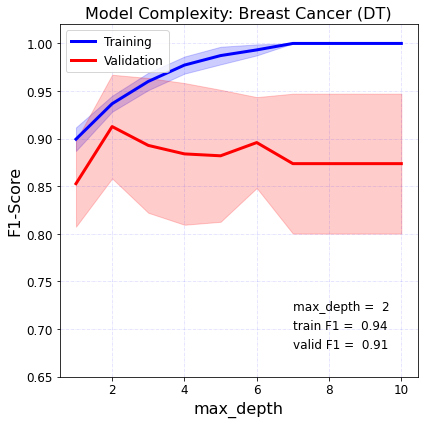

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Breast Cancer (DT)", size = 16 )
plt.xlabel(r"max_depth", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(max_depth_range, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(max_depth_range, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(max_depth_range, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(7, 0.72, r'max_depth =  {}'.format(opt_max_depth), size=12)
plt.text(7, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(7, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Only focus on max_depth parameter
max_depth_range = list(range(1,15))

# Generate train and validation scores
train_scores, val_scores = validation_curve(DecisionTreeClassifier(criterion='gini',
                                                                  class_weight='balanced',
                                                                  random_state=42),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='max_depth',
                                            param_range=max_depth_range,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

train_scores_mean[:5]

Out[24]: array([0.83908244, 0.84764759, 0.86158342, 0.88628024, 0.90709706])

In [ ]:
#identify best max_depth and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

opt_max_depth = np.asarray(max_depth_range)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_max_depth, train_f1, val_f1)

1 2 0.85 0.84

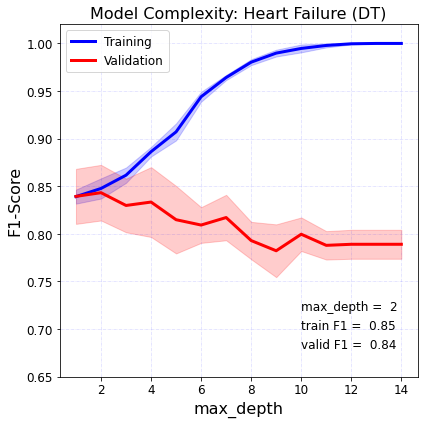

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Heart Failure (DT)", size = 16 )
plt.xlabel(r"max_depth", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(max_depth_range, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")

# validation curve
plt.plot(max_depth_range, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(max_depth_range, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(10, 0.72, r'max_depth =  {}'.format(opt_max_depth), size=12)
plt.text(10, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(10, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(DecisionTreeClassifier(criterion='gini',
                                                                                            max_depth=2,
                                                                                            class_weight='balanced',
                                                                                            random_state=42),
                                                                      X=X_train_bc,
                                                                      y=y_train_bc,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean[:5]

Out[27]: array([0.86448167, 0.91114981, 0.89112241, 0.89096868, 0.91266925])

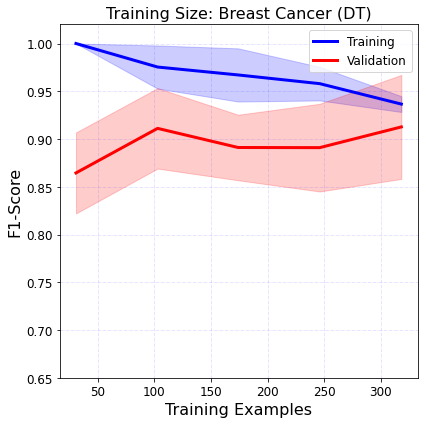

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Breast Cancer (DT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

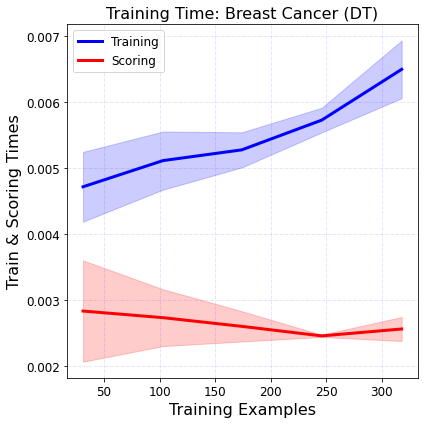

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Breast Cancer (DT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(DecisionTreeClassifier(criterion='gini',
                                                                                            max_depth=2,
                                                                                            class_weight='balanced',
                                                                                            random_state=42),
                                                                      X=X_train_hf,
                                                                      y=y_train_hf,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean[:5]

Out[30]: array([0.77669742, 0.80804616, 0.84041358, 0.8114693 , 0.84321794])

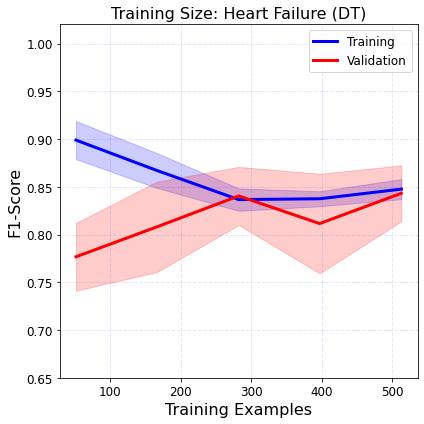

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Heart Failure (DT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

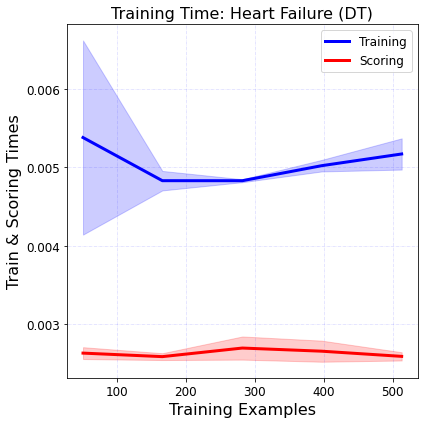

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Heart Failure (DT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Breast Cancer Data
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=2,
                            class_weight='balanced',
                            random_state=42)

# fit model
dt.fit(X_train_bc, y_train_bc)

Out[33]: DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [ ]:
# Breast cancer
pred_test = dt.predict(X_test_bc)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.02000
Model Prediction Time (s): 0.02000

F1 Score: 0.86
Accuracy: 0.91 AUC: 0.88
Precision: 0.98 Recall: 0.77
*****************************************************
Out[35]:

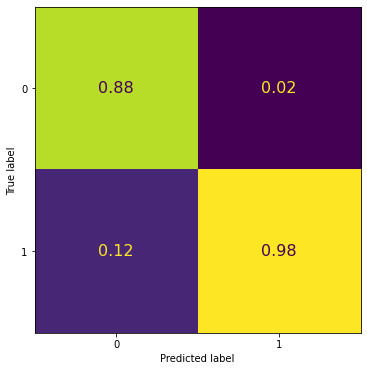

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fed38a77940>

In [ ]:
auc = roc_auc_score(y_test_bc, pred_test)
f1 = f1_score(y_test_bc, pred_test)
accuracy = accuracy_score(y_test_bc, pred_test)
precision = precision_score(y_test_bc, pred_test)
recall = recall_score(y_test_bc, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.02))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.02))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_bc, pred_test)
plot_confusion_matrix(dt, X_test_bc, y_test_bc,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

In [ ]:
# Heart Failure Data
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=2,
                            class_weight='balanced',
                            random_state=42)

# fit model
dt.fit(X_train_hf, y_train_hf)

Out[36]: DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [ ]:
# Heart Failure
pred_test = dt.predict(X_test_hf)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.03000
Model Prediction Time (s): 0.01000

F1 Score: 0.82
Accuracy: 0.80 AUC: 0.80
Precision: 0.83 Recall: 0.82
*****************************************************
Out[38]:

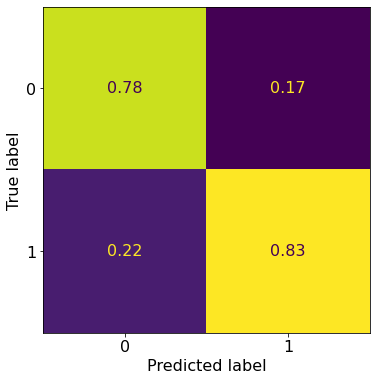

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fed38b58a60>

In [ ]:
auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.03))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.01))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_hf, pred_test)
plot_confusion_matrix(dt, X_test_hf, y_test_hf,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

# Neural networks: MLPClassifier

In [ ]:
# Only focus on hidden_layer_sizes parameter
# default value is 100
hidden_layer_sizes_lst = [40, 75, 100, 125, 150, 175, 200, 225, 250, 275]

# Generate train and validation scores
train_scores, val_scores = validation_curve(MLPClassifier(solver='adam',
                                                          activation='relu',
                                                          warm_start=True,
                                                          random_state=42,
                                                          early_stopping=True,
                                                          validation_fraction=0.3,
                                                          n_iter_no_change=50),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='hidden_layer_sizes',
                                            param_range=hidden_layer_sizes_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

train_scores_mean

Out[67]: array([0.87944157, 0.85780356, 0.88162441, 0.88427423, 0.88768637,
 0.87774491, 0.88804445, 0.90518317, 0.90268082, 0.88568767])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

opt_hidden_layer_sizes = np.asarray(hidden_layer_sizes_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_hidden_layer_sizes, train_f1, val_f1)

8 250 0.9 0.9

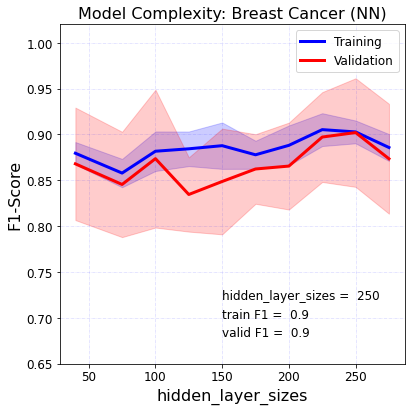

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Breast Cancer (NN)", size = 16 )
plt.xlabel(r"hidden_layer_sizes", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(hidden_layer_sizes_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(hidden_layer_sizes_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(hidden_layer_sizes_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(hidden_layer_sizes_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(150, 0.72, r'hidden_layer_sizes =  {}'.format(opt_hidden_layer_sizes), size=12)
plt.text(150, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(150, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Only focus on hidden_layer_sizes parameter
# default value is 100
hidden_layer_sizes_lst = [40, 75, 100, 125, 150, 175, 200, 225, 250, 275]

# Generate train and validation scores
train_scores, val_scores = validation_curve(MLPClassifier(solver='adam',
                                                          activation='relu',
                                                          warm_start=True,
                                                          random_state=42,
                                                          early_stopping=True,
                                                          validation_fraction=0.3,
                                                          n_iter_no_change=50),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='hidden_layer_sizes',
                                            param_range=hidden_layer_sizes_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

train_scores_mean

Out[71]: array([0.83942729, 0.8751624 , 0.8633084 , 0.87267246, 0.87903102,
 0.87594271, 0.88120027, 0.88926611, 0.88505438, 0.88784418])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

opt_hidden_layer_sizes = np.asarray(hidden_layer_sizes_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_hidden_layer_sizes, train_f1, val_f1)

6 200 0.88 0.86

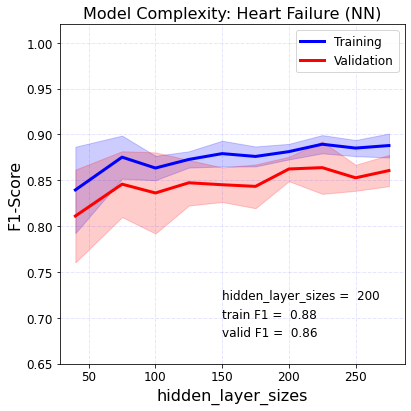

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Heart Failure (NN)", size = 16 )
plt.xlabel(r"hidden_layer_sizes", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(hidden_layer_sizes_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(hidden_layer_sizes_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(hidden_layer_sizes_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(hidden_layer_sizes_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(150, 0.72, r'hidden_layer_sizes =  {}'.format(opt_hidden_layer_sizes), size=12)
plt.text(150, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(150, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(MLPClassifier(solver='adam',
                                                                                             hidden_layer_sizes = (250,),
                                                                                             activation='relu',
                                                                                             warm_start=True,
                                                                                             random_state=42,
                                                                                             early_stopping=True,
                                                                                             validation_fraction=0.3,
                                                                                             n_iter_no_change=50),
                                                                      X=X_train_bc,
                                                                      y=y_train_bc,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[74]: array([0.81460649, 0.86455448, 0.89111509, 0.89051205, 0.90709741])

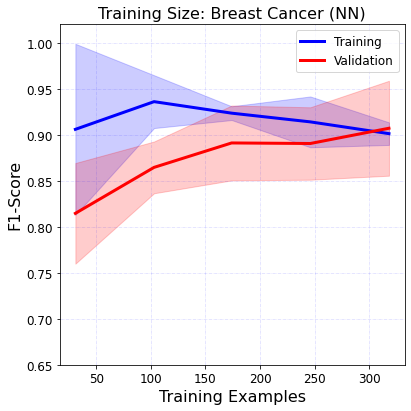

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Breast Cancer (NN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

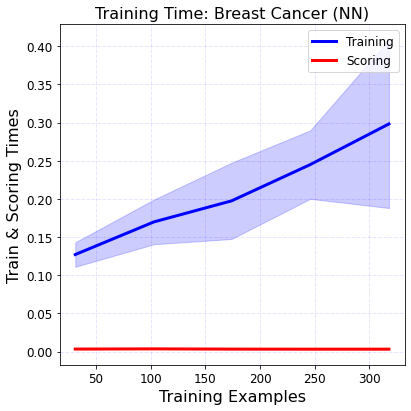

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Breast Cancer (NN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(MLPClassifier(solver='adam',
                                                                                             hidden_layer_sizes = (200,),
                                                                                             activation='relu',
                                                                                             warm_start=True,
                                                                                             random_state=42,
                                                                                             early_stopping=True,
                                                                                             validation_fraction=0.3,
                                                                                             n_iter_no_change=50),
                                                                      X=X_train_hf,
                                                                      y=y_train_hf,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[77]: array([0.74035729, 0.78893123, 0.83621878, 0.84013093, 0.8611883 ])

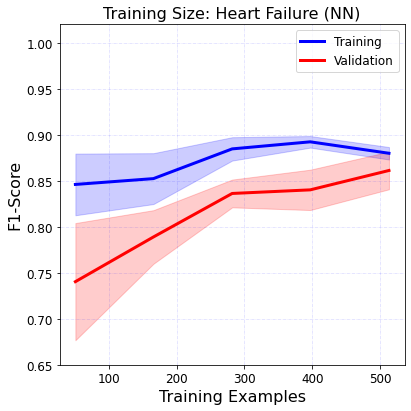

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Heart Failure (NN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

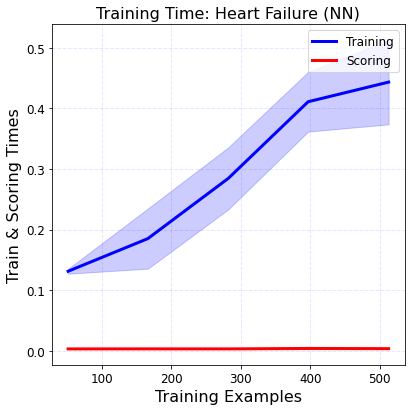

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Heart Failure (NN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Breast Cancer Data
mlp = MLPClassifier(solver='adam',
                   hidden_layer_sizes = (250,),
                   activation='relu',
                   warm_start=True,
                   random_state=42,
                   early_stopping=True,
                   validation_fraction=0.3,
                   n_iter_no_change=50)

# fit model
mlp.fit(X_train_bc, y_train_bc)

Out[80]: MLPClassifier(early_stopping=True, hidden_layer_sizes=(250,),
 n_iter_no_change=50, random_state=42, validation_fraction=0.3,
 warm_start=True)

In [ ]:
# Breast cancer
pred_test = mlp.predict(X_test_bc)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.35000
Model Prediction Time (s): 0.02000

F1 Score: 0.86
Accuracy: 0.91 AUC: 0.88
Precision: 0.96 Recall: 0.78
*****************************************************
Out[84]:

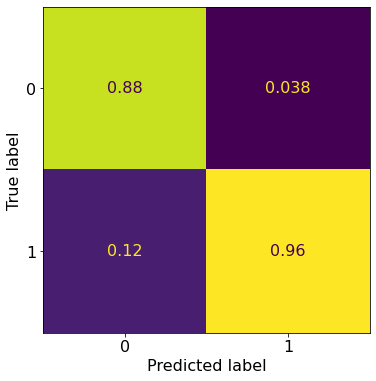

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fecf89f2910>

In [ ]:
auc = roc_auc_score(y_test_bc, pred_test)
f1 = f1_score(y_test_bc, pred_test)
accuracy = accuracy_score(y_test_bc, pred_test)
precision = precision_score(y_test_bc, pred_test)
recall = recall_score(y_test_bc, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.35))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.02))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_bc, pred_test)
plot_confusion_matrix(mlp, X_test_bc, y_test_bc,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

In [ ]:
# heart failure Data
mlp = MLPClassifier(solver='adam',
                   hidden_layer_sizes = (200,),
                   activation='relu',
                   warm_start=True,
                   random_state=42,
                   early_stopping=True,
                   validation_fraction=0.3,
                   n_iter_no_change=50)

# fit model
mlp.fit(X_train_hf, y_train_hf)

Out[85]: MLPClassifier(early_stopping=True, hidden_layer_sizes=(200,),
 n_iter_no_change=50, random_state=42, validation_fraction=0.3,
 warm_start=True)

In [ ]:
# heart failure Data
pred_test = mlp.predict(X_test_hf)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.61000
Model Prediction Time (s): 0.03000

F1 Score: 0.87
Accuracy: 0.86 AUC: 0.86
Precision: 0.89 Recall: 0.86
*****************************************************
Out[89]:

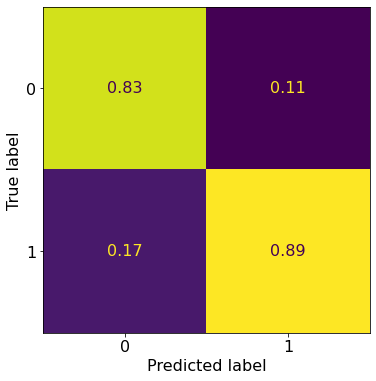

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fecf8eafd60>

In [ ]:
auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.61))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.03))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_hf, pred_test)
plot_confusion_matrix(mlp, X_test_hf, y_test_hf,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

# Boosting: GradientBoostingClassifier

In [ ]:
# Only focus on n_estimators parameter
# default value is 100
# used max_depth from the DT analysis for these two datasets
n_estimators_lst = [20, 40, 60, 80, 100, 120, 140, 160, 180]

# Generate train and validation scores
train_scores, val_scores = validation_curve(GradientBoostingClassifier(max_depth=2,
                                                                        max_features='log2',
                                                                        warm_start=True,
                                                                        random_state=42,
                                                                        validation_fraction=0.3,
                                                                        n_iter_no_change=50),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='n_estimators',
                                            param_range=n_estimators_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

train_scores_mean

Out[111]: array([0.96335554, 0.97853014, 0.98636013, 0.98895744, 0.98812774,
 0.98812774, 0.98897144, 0.99069548, 0.99069548])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

opt_n_estimators = np.asarray(n_estimators_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_n_estimators, train_f1, val_f1)

2 60 0.99 0.94

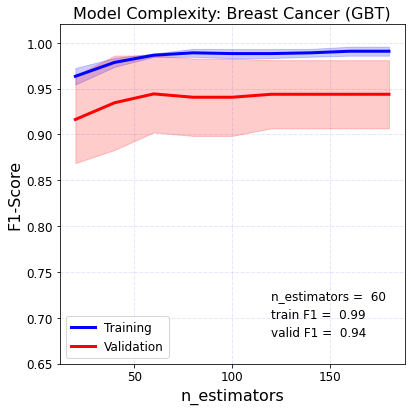

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Breast Cancer (GBT)", size = 16 )
plt.xlabel(r"n_estimators", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(n_estimators_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(n_estimators_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(n_estimators_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(n_estimators_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(120, 0.72, r'n_estimators =  {}'.format(opt_n_estimators), size=12)
plt.text(120, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(120, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Only focus on n_estimators parameter
# default value is 100
# used max_depth from the DT analysis for these two datasets
n_estimators_lst = [20, 40, 60, 80, 100, 120, 140, 160, 180]

# Generate train and validation scores
train_scores, val_scores = validation_curve(GradientBoostingClassifier(max_depth=2,
                                                                        max_features='log2',
                                                                        warm_start=True,
                                                                        random_state=42,
                                                                        validation_fraction=0.3,
                                                                        n_iter_no_change=50),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='n_estimators',
                                            param_range=n_estimators_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

train_scores_mean

Out[114]: array([0.88048634, 0.88912476, 0.89290953, 0.89688739, 0.90071749,
 0.90172866, 0.90274333, 0.90302111, 0.90334704])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

opt_n_estimators = np.asarray(n_estimators_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_n_estimators, train_f1, val_f1)

1 40 0.89 0.87

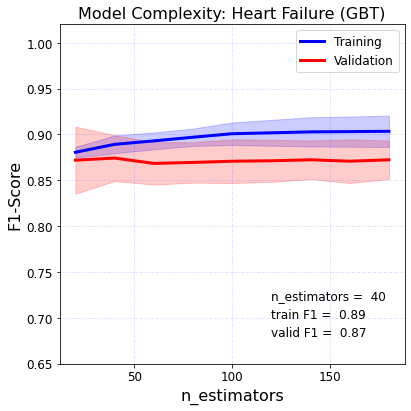

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Heart Failure (GBT)", size = 16 )
plt.xlabel(r"n_estimators", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(n_estimators_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(n_estimators_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(n_estimators_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(n_estimators_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(120, 0.72, r'n_estimators =  {}'.format(opt_n_estimators), size=12)
plt.text(120, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(120, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(GradientBoostingClassifier(max_depth=2,
                                                                                                          n_estimators=60,
                                                                                                          max_features='log2',
                                                                                                          warm_start=True,
                                                                                                          random_state=42,
                                                                                                          validation_fraction=0.3,
                                                                                                          n_iter_no_change=50),
                                                                      X=X_train_bc,
                                                                      y=y_train_bc,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[117]: array([0.87706588, 0.91930228, 0.91042221, 0.91829646, 0.93064731])

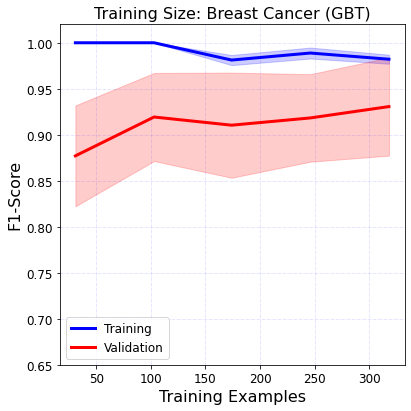

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Breast Cancer (GBT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

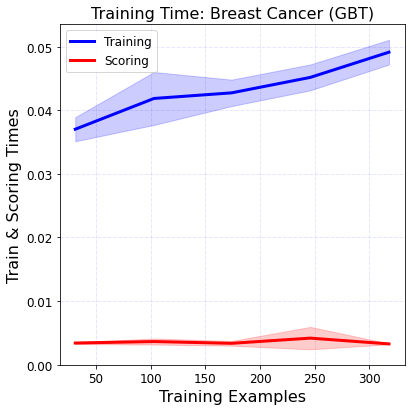

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Breast Cancer (GBT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(GradientBoostingClassifier(max_depth=2,
                                                                                                          n_estimators=40,
                                                                                                          max_features='log2',
                                                                                                          warm_start=True,
                                                                                                          random_state=42,
                                                                                                          validation_fraction=0.3,
                                                                                                          n_iter_no_change=50),
                                                                      X=X_train_hf,
                                                                      y=y_train_hf,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[123]: array([0.8089601 , 0.84735536, 0.86602622, 0.86564803, 0.86824453])

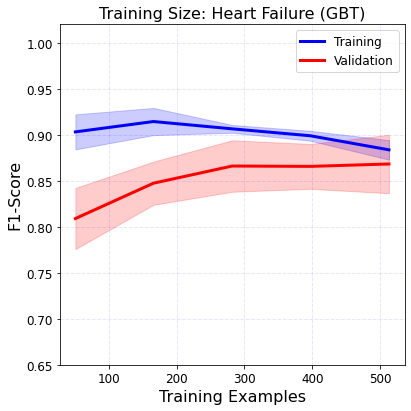

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Heart Failure (GBT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

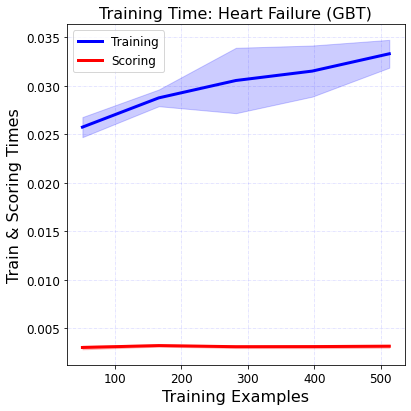

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Heart Failure (GBT)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Breast Cancer Data
gbt = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=60,
                                 max_features='log2',
                                 warm_start=True,
                                 random_state=42,
                                 validation_fraction=0.3,
                                 n_iter_no_change=50)

# fit model
gbt.fit(X_train_bc, y_train_bc)

Out[126]: GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=60,
 n_iter_no_change=50, random_state=42,
 validation_fraction=0.3, warm_start=True)

In [ ]:
# Breast cancer
pred_test = gbt.predict(X_test_bc)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.10000
Model Prediction Time (s): 0.02000

F1 Score: 0.94
Accuracy: 0.96 AUC: 0.95
Precision: 1.00 Recall: 0.89
*****************************************************
Out[128]:

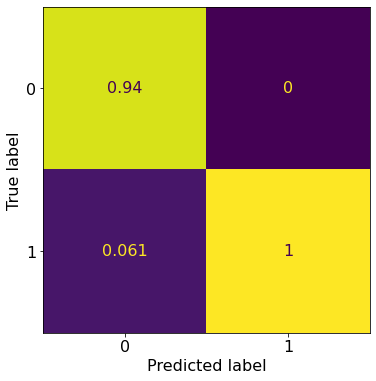

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fecf3bb5640>

In [ ]:
auc = roc_auc_score(y_test_bc, pred_test)
f1 = f1_score(y_test_bc, pred_test)
accuracy = accuracy_score(y_test_bc, pred_test)
precision = precision_score(y_test_bc, pred_test)
recall = recall_score(y_test_bc, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.10))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.02))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_bc, pred_test)
plot_confusion_matrix(gbt, X_test_bc, y_test_bc,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

In [ ]:
# Breast Cancer Data
gbt = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=40,
                                 max_features='log2',
                                 warm_start=True,
                                 random_state=42,
                                 validation_fraction=0.3,
                                 n_iter_no_change=50)

# fit model
gbt.fit(X_train_hf, y_train_hf)

Out[129]: GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=40,
 n_iter_no_change=50, random_state=42,
 validation_fraction=0.3, warm_start=True)

In [ ]:
# Breast cancer
pred_test = gbt.predict(X_test_hf)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.07000
Model Prediction Time (s): 0.02000

F1 Score: 0.91
Accuracy: 0.89 AUC: 0.89
Precision: 0.88 Recall: 0.93
*****************************************************
Out[132]:

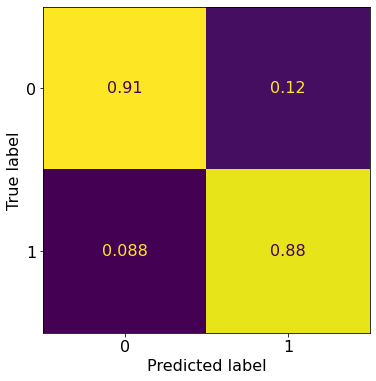

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fecf3ac99d0>

In [ ]:
auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.07))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.02))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_hf, pred_test)
plot_confusion_matrix(gbt, X_test_hf, y_test_hf,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

# Support Vector Machines (SVM)

In [ ]:
# Initially focus on kernel parameter
# default value is 'rbf'
# optimal for this data is 'linear'
kernel_lst = ['linear', 'poly', 'rbf', 'sigmoid']

# Generate train and validation scores
train_scores, val_scores = validation_curve(SVC(random_state=42),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='kernel',
                                            param_range=kernel_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[137]: array([0.93666671, 0.84998349, 0.86460605, 0.15173517])

In [ ]:
# Initially focus on kernel parameter
# default value is 'rbf'
# optimal for this data is 'linear'
kernel_lst = ['linear', 'poly', 'rbf', 'sigmoid']

# Generate train and validation scores
train_scores, val_scores = validation_curve(SVC(random_state=42),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='kernel',
                                            param_range=kernel_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[138]: array([0.8581177 , 0.73067477, 0.71881897, 0.59865651])

In [ ]:
# Then focus on C regularization parameter
# default value is 'rbf'
# optimal for this data is 'linear'
C_lst = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# Generate train and validation scores
train_scores, val_scores = validation_curve(SVC(kernel='linear', random_state=42),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='C',
                                            param_range=C_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[158]: array([0.89434259, 0.90450264, 0.91719128, 0.93024388, 0.92374969])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
# min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
# if min_idx==0:
#   min_idx = min_idx+1

min_idx = 3

opt_c = np.asarray(C_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_c, train_f1, val_f1)

3 0.01 0.94 0.93

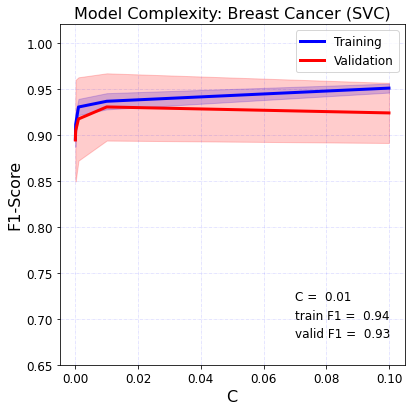

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Breast Cancer (SVC)", size = 16 )
plt.xlabel(r"C", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(C_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(C_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(C_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(C_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(.07, 0.72, r'C =  {}'.format(opt_c), size=12)
plt.text(.07, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(.07, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Then focus on C regularization parameter
# default value is 'rbf'
# optimal for this data is 'linear'
C_lst = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# Generate train and validation scores
train_scores, val_scores = validation_curve(SVC(kernel='linear', random_state=42),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='C',
                                            param_range=C_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[152]: array([0.71655745, 0.72304427, 0.78674044, 0.85598149, 0.86443031])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
# min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
# if min_idx==0:
#   min_idx = min_idx+1

min_idx=4

opt_c = np.asarray(C_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_c, train_f1, val_f1)

4 0.1 0.87 0.86

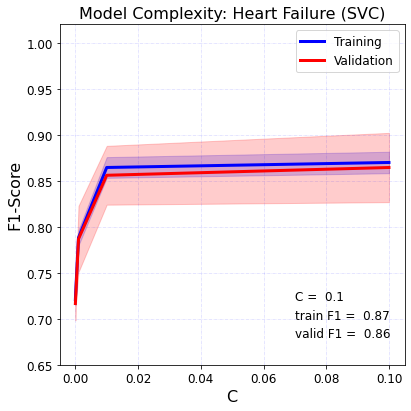

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Heart Failure (SVC)", size = 16 )
plt.xlabel(r"C", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(C_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(C_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(C_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(C_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(.07, 0.72, r'C =  {}'.format(opt_c), size=12)
plt.text(.07, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(.07, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(SVC(kernel='linear', C=0.01, random_state=42),
                                                                      X=X_train_bc,
                                                                      y=y_train_bc,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[161]: array([0.87478289, 0.89709718, 0.90618243, 0.91937117, 0.93024388])

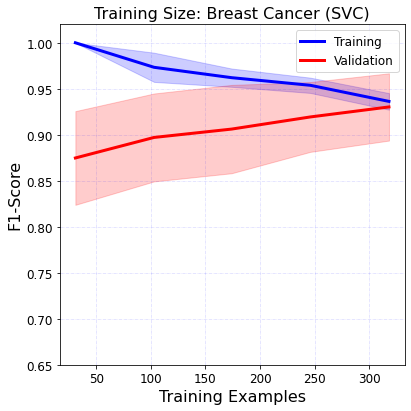

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Breast Cancer (SVC)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

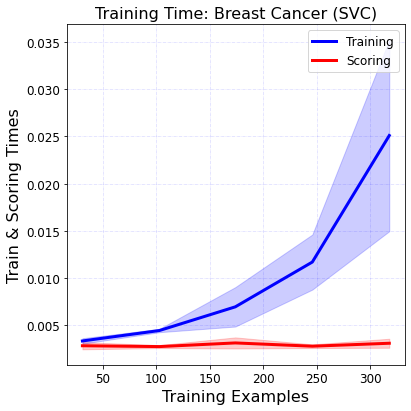

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Breast Cancer (SVC)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(SVC(kernel='linear', C=0.1, random_state=42),
                                                                      X=X_train_hf,
                                                                      y=y_train_hf,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[164]: array([0.81306787, 0.84813995, 0.86093815, 0.86094145, 0.8655262 ])

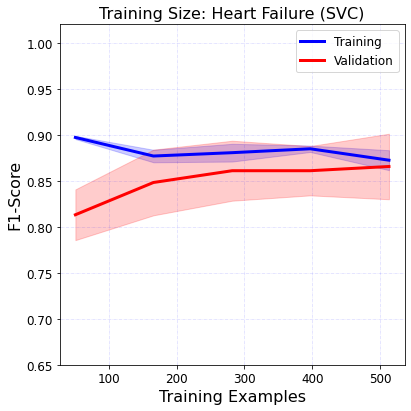

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Heart Failure (SVC)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

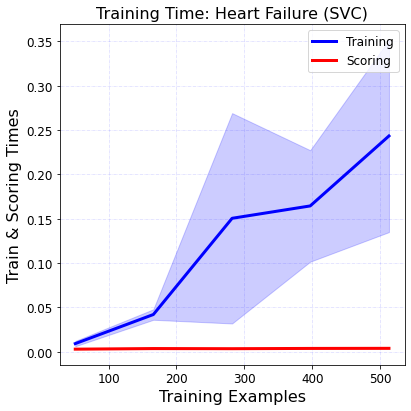

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Heart Failure (SVC)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Breast Cancer Data
svc = SVC(kernel='linear',
          C=0.01,
          random_state=42)

# fit model
svc.fit(X_train_bc, y_train_bc)

Out[167]: SVC(C=0.01, kernel='linear', random_state=42)

In [ ]:
# Breast cancer
pred_test = svc.predict(X_test_bc)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.07000
Model Prediction Time (s): 0.02000

F1 Score: 0.93
Accuracy: 0.95 AUC: 0.93
Precision: 0.98 Recall: 0.88
*****************************************************
Out[169]:

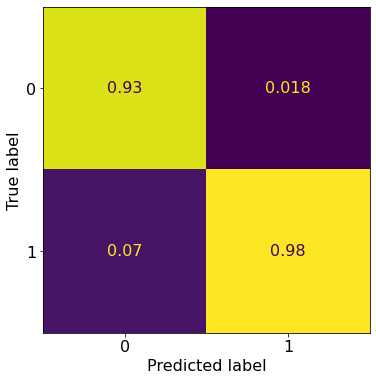

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fecf875f940>

In [ ]:
auc = roc_auc_score(y_test_bc, pred_test)
f1 = f1_score(y_test_bc, pred_test)
accuracy = accuracy_score(y_test_bc, pred_test)
precision = precision_score(y_test_bc, pred_test)
recall = recall_score(y_test_bc, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.07))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.02))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_bc, pred_test)
plot_confusion_matrix(svc, X_test_bc, y_test_bc,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

In [ ]:
# Breast Cancer Data
svc = SVC(kernel='linear',
          C=0.1,
          random_state=42)

# fit model
svc.fit(X_train_hf, y_train_hf)

Out[170]: SVC(C=0.1, kernel='linear', random_state=42)

In [ ]:
# heart failure
pred_test = svc.predict(X_test_hf)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.92000
Model Prediction Time (s): 0.03000

F1 Score: 0.90
Accuracy: 0.88 AUC: 0.88
Precision: 0.88 Recall: 0.92
*****************************************************
Out[172]:

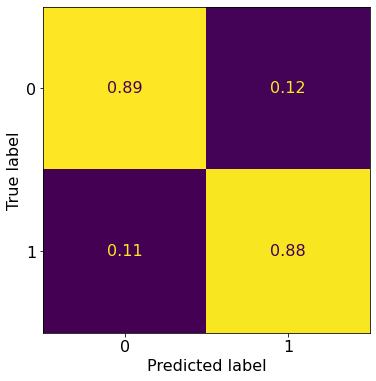

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fed6a515700>

In [ ]:
auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.92))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.03))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_hf, pred_test)
plot_confusion_matrix(svc, X_test_hf, y_test_hf,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

# k-Nearest Neighbors (KNN)

In [ ]:
# First focus on distance metric 
# default value is 'minkowski'
# optimal for this data is 'seuclidean'
metric_lst = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'seuclidean', 'mahalanobis']

# Generate train and validation scores
train_scores, val_scores = validation_curve(KNeighborsClassifier(),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='metric',
                                            param_range=metric_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[176]: array([0.90185809, 0.91864709, 0.88753276, 0.90185809, 0.95639992,
 0.54010231])

In [ ]:
# First focus on distance metric 
# default value is 'minkowski'
# optimal for this data is 'seuclidean'
metric_lst = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'seuclidean', 'mahalanobis']

# Generate train and validation scores
train_scores, val_scores = validation_curve(KNeighborsClassifier(),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='metric',
                                            param_range=metric_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[177]: array([0.71455981, 0.77249528, 0.7201395 , 0.71455981, 0.85095379,
 nan])

In [ ]:
# First focus on n_neighbors parameter 
# default value is 'minkowski'
# optimal for this data is 'seuclidean'
n_neighbors_lst = list(range(1,21))

# Generate train and validation scores
train_scores, val_scores = validation_curve(KNeighborsClassifier(metric='seuclidean'),
                                            X=X_train_bc,
                                            y=y_train_bc,
                                            param_name='n_neighbors',
                                            param_range=n_neighbors_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[178]: array([0.94012503, 0.93405273, 0.95006853, 0.94186312, 0.95639992,
 0.94926344, 0.95300209, 0.94949927, 0.95300209, 0.94199959,
 0.94236688, 0.94563367, 0.94236688, 0.93405022, 0.94170572,
 0.93041614, 0.93097407, 0.93097407, 0.93473347, 0.93444187])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
# min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
# if min_idx==0:
#   min_idx = min_idx+1

min_idx = 4

opt_n_neighbors = np.asarray(n_neighbors_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_n_neighbors, train_f1, val_f1)

4 5 0.96 0.96

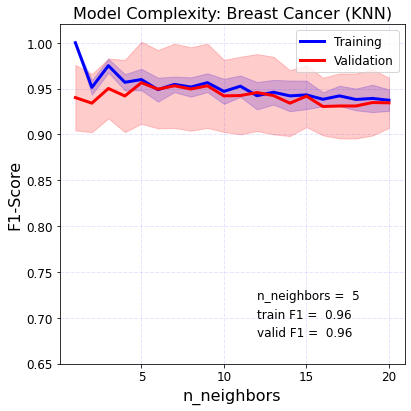

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Breast Cancer (KNN)", size = 16 )
plt.xlabel(r"n_neighbors", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(n_neighbors_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(n_neighbors_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(n_neighbors_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(n_neighbors_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(12, 0.72, r'n_neighbors =  {}'.format(opt_n_neighbors), size=12)
plt.text(12, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(12, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# First focus on n_neighbors parameter 
# default value is 'minkowski'
# optimal for this data is 'seuclidean'
n_neighbors_lst = list(range(1,21))

# Generate train and validation scores
train_scores, val_scores = validation_curve(KNeighborsClassifier(metric='seuclidean'),
                                            X=X_train_hf,
                                            y=y_train_hf,
                                            param_name='n_neighbors',
                                            param_range=n_neighbors_lst,
                                            scoring='f1',
                                            n_jobs=-1)

# compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

val_scores_mean

Out[187]: array([0.8250282 , 0.79309641, 0.83657282, 0.82371544, 0.85095379,
 0.82865497, 0.85204332, 0.84044158, 0.84777742, 0.84501487,
 0.85366427, 0.85389886, 0.86232983, 0.85735747, 0.86485593,
 0.86037626, 0.86569338, 0.85626524, 0.85768757, 0.8569795 ])

In [ ]:
#identify best hidden_layer_sizes and corresponding train & validation scores
train_test_diff = train_scores_mean - val_scores_mean
min_idx = np.where(train_test_diff == train_test_diff.min())[0][0]
if min_idx==0:
  min_idx = min_idx+1

# min_idx = 4

opt_n_neighbors = np.asarray(n_neighbors_lst)[min_idx]
train_f1 = np.round(train_scores_mean[min_idx],2)
val_f1 = np.round(val_scores_mean[min_idx],2)

print(min_idx, opt_n_neighbors, train_f1, val_f1)

16 17 0.87 0.87

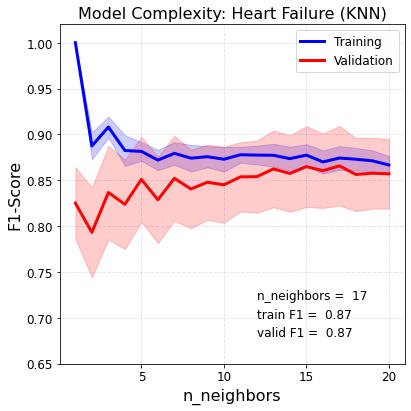

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Model Complexity: Heart Failure (KNN)", size = 16 )
plt.xlabel(r"n_neighbors", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(n_neighbors_lst, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(n_neighbors_lst, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(n_neighbors_lst, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(n_neighbors_lst, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.text(12, 0.72, r'n_neighbors =  {}'.format(opt_n_neighbors), size=12)
plt.text(12, 0.70, r'train F1 =  {}'.format(train_f1), size=12)
plt.text(12, 0.68, r'valid F1 =  {}'.format(val_f1), size=12)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(KNeighborsClassifier(metric='seuclidean',
                                                                                                    n_neighbors=12),
                                                                      X=X_train_bc,
                                                                      y=y_train_bc,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[190]: array([0.68056061, 0.91088114, 0.94533776, 0.94183104, 0.94563367])

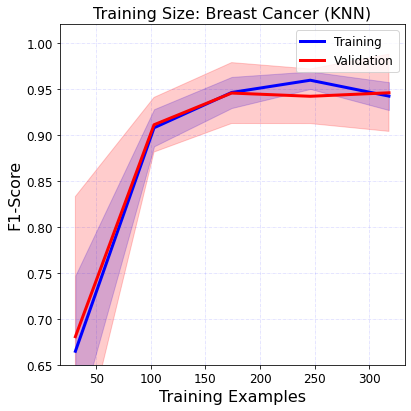

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Breast Cancer (KNN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

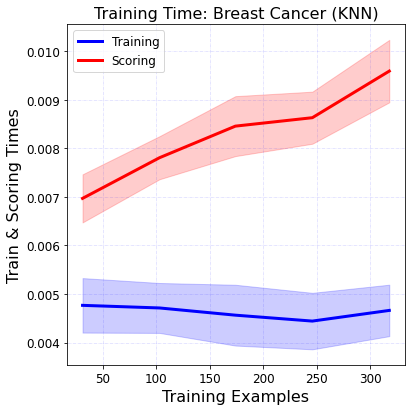

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Breast Cancer (KNN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# trainsizes as fractions
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(KNeighborsClassifier(metric='seuclidean',
                                                                                                    n_neighbors=17),
                                                                      X=X_train_hf,
                                                                      y=y_train_hf,
                                                                      cv=5,
                                                                      scoring='f1',
                                                                      n_jobs=-1,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True,
                                                                      random_state=42)

# mean values
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

val_scores_mean

Out[193]: array([0.84881357, 0.86246633, 0.85812407, 0.86239564, 0.86449831])

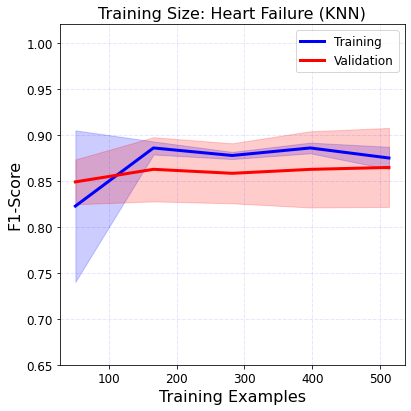

In [ ]:
'''
>>> as sample size increases, model overfitting is reduced
>>> overfitting is measured as the difference between train & validation F1-scores
>>> the lower the difference, the less the over-fitting

'''
fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Size: Heart Failure (KNN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("F1-Score", size = 16)
plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, train_scores_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, val_scores_mean, label="Validation", color="r", lw=3)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

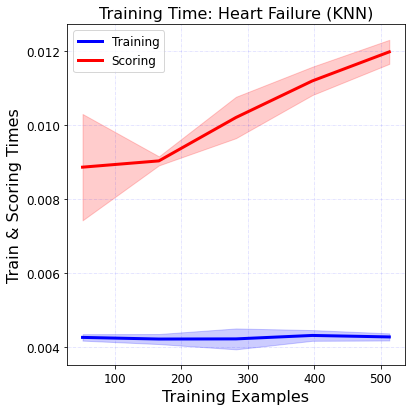

In [ ]:
'''
>>> train time is linear as a function of sample sizes
>>> scoring time is relatively constant

'''

fig = plt.figure(figsize=(6, 6))

# Train curve
plt.title("Training Time: Heart Failure (KNN)", size = 16 )
plt.xlabel(r"Training Examples", size = 16)
plt.ylabel("Train & Scoring Times", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(train_sizes, fit_times_mean, label="Training", color="b", lw=3)
plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.2, color="b")
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2, color='blue', zorder=0.5)

# validation curve
plt.plot(train_sizes, score_times_mean, label="Scoring", color="r", lw=3)
plt.fill_between(train_sizes, score_times_mean - score_times_std, score_times_mean + score_times_std, alpha=0.2,color="r")

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

In [ ]:
# Breast Cancer Data
knn = KNeighborsClassifier(metric='seuclidean',
                           n_neighbors=12)

# fit model
knn.fit(X_train_bc, y_train_bc)

Out[196]: KNeighborsClassifier(metric='seuclidean', n_neighbors=12)

In [ ]:
# Breast cancer
pred_test = knn.predict(X_test_bc)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.03000
Model Prediction Time (s): 0.03000

F1 Score: 0.93
Accuracy: 0.95 AUC: 0.94
Precision: 1.00 Recall: 0.88
*****************************************************
Out[199]:

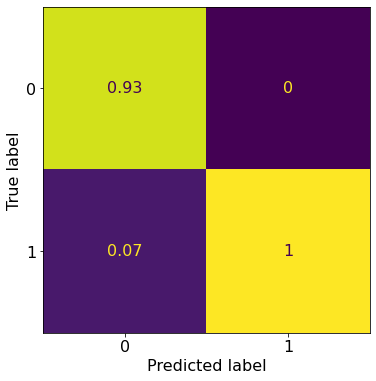

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fed39323310>

In [ ]:
auc = roc_auc_score(y_test_bc, pred_test)
f1 = f1_score(y_test_bc, pred_test)
accuracy = accuracy_score(y_test_bc, pred_test)
precision = precision_score(y_test_bc, pred_test)
recall = recall_score(y_test_bc, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.03))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.03))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_bc, pred_test)
plot_confusion_matrix(knn, X_test_bc, y_test_bc,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)

In [ ]:
# heart failure Data
knn = KNeighborsClassifier(metric='seuclidean',
                           n_neighbors=17)

# fit model
knn.fit(X_train_hf, y_train_hf)

Out[200]: KNeighborsClassifier(metric='seuclidean', n_neighbors=17)

In [ ]:
# heart failure
pred_test = knn.predict(X_test_hf)

Model Evaluation Metrics for the Test Dataset
*****************************************************
Model Training Time (s): 0.04000
Model Prediction Time (s): 0.05000

F1 Score: 0.90
Accuracy: 0.89 AUC: 0.89
Precision: 0.90 Recall: 0.90
*****************************************************
Out[202]:

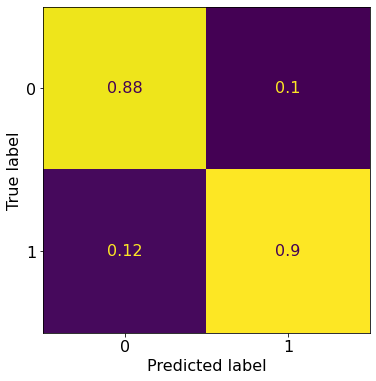

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fed3939ef70>

In [ ]:
auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("Model Training Time (s):   "+"{:.5f}".format(0.04))
print("Model Prediction Time (s): "+"{:.5f}\n".format(0.05))
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test_hf, pred_test)
plot_confusion_matrix(knn, X_test_hf, y_test_hf,
                                normalize='pred',
                                colorbar=False,
                                ax=ax)